In [1]:
import numpy as np
import matplotlib.pyplot as plt

$\textbf{Eulero implicito per una ODE scalare}$

Si consideri l'ODE $$\dot{y} = f(t,y), y(0)=y_0$$ (non è restrittivo supporre che sia un sistema di ODEs)


Lo schema di Eulero implicito, ottenuto tramite quadratura con la regola del rettangolo è:

$$y_{n+1} = y_n + f(t_{n+1},y_{n+1}), \quad k \geq 0$$

dove si intende $y_n \approx y(t_n)$, partendo da $y_0$ dato dalla condizione iniziale.

A priori, è necessario ad ogni iterazione risolvere un'equazione non linere per trovare la soluzione. Questo può essere risolto con il metodo di Newton (più conveniente rispetto ad un punto fisso).

In particolare, va azzerata la funzione (di una sola variabile):

$F(x) = x-y_n- f_x(t_{n+1},x)$

$\textbf{Esempio}$

Risolviamo l'equazione con $f(t,y)= -y, \quad t \geq 0$

Per questo caso, non sarebbe necessrio risolvere alcuna equazione non-lineare.

In [2]:
def my_newtn(F,JF,tn,yn,tol,func,dfunc):
    maxit = 50
    it = 0
    x = yn
    delta = -F(x,tn,yn,k,func)/JF(x,tn,k,dfunc)
    while(abs(delta)>tol and it<maxit):
        x+=delta
        delta = -F(x,tn,yn,k,func)/JF(x,tn,k,dfunc)
        it+=1
    
    return x

In [3]:
def F(x,tn,yn,k,func):
    #funzione da azzerare ad ogni time-step
    return x - yn - k * func(tn+k,x)


def JF(x,tn,k,dfunc):
    #jacobiano (derivata in questo caso) della funzione F
    return 1 - k*dfunc(tn+k,x)


def stepper(F,JF,tn,yn,k,func,dfunc):
    #calcola un passo di eulero implicito tramite metodo di Newton.
    tol = k**2/10 #local error 
    return my_newtn(F,JF,tn,yn,tol,func,dfunc)

In [4]:
def euleroimplicito(func,tspan,y0,dfunc,k):
    #df: derivata rispetto a y
    #tspan: [t0, tf]
    ts = int(np.ceil(tspan[1]/k))
    y = np.zeros(ts+1)
    t = np.zeros(ts+1)
    y[0] = y0
    t[0] = 0
    for n in range(0,ts):
        y[n+1] = stepper(F,JF,t[n],y[n],k,func,dfunc)
        t[n+1] = t[n] + k
        
    return np.array([t,y])

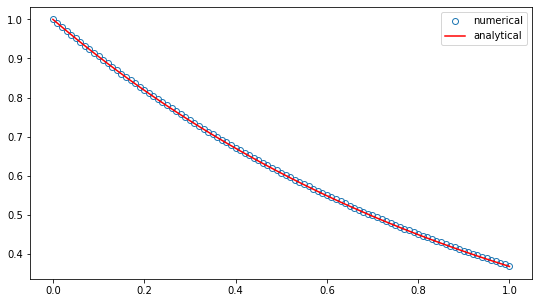

In [5]:
def f(t,y):
    return -y


def df(t,y):
    return -1


tspan = [0, 1]
y0 = 1
k = 0.01
[t,y] = euleroimplicito(f,tspan,y0,df,k)
plt.figure(figsize=(9,5))
plt.plot(t,y,'o',markerfacecolor='None',label='numerical')
plt.plot(t,np.exp(-t),'r',label='analytical')
plt.legend()

$\bullet \textbf{Verifica dell'ordine di convergenza} $

Espandendo in serie di Taylor, si trova che $$y(t_{n+1}) - y(t_n) - k \cdot f(t_n,y(t_{n+1})) = \mathcal{O}(k^2)$$

Poiché il metodo è convergente, si ha che l'ordine di convergenza è $1$.

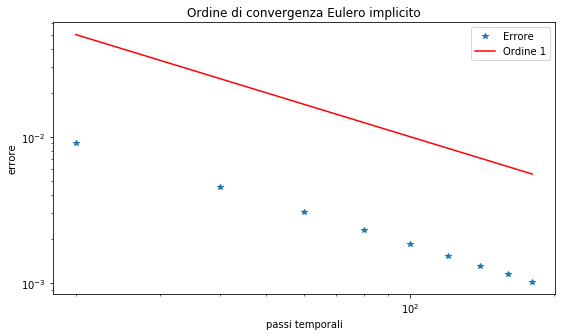

In [6]:
tsrange = np.arange(20,200,20)
err = []

for ts in tsrange:
    k = tspan[1]/ts
    [t,y] = euleroimplicito(f,tspan,y0,df,k)
    err.append(abs(np.exp(-tspan[1])-y[-1]))

plt.figure(figsize=(9,5))
plt.title('Ordine di convergenza Eulero implicito')
plt.loglog(tsrange,err,'*',label='Errore')
plt.loglog(tsrange,1/tsrange,'r',label='Ordine 1')
plt.xlabel('passi temporali')
plt.ylabel('errore')
plt.legend()

$\bullet \textbf{Altra funzione...}$

Consideriamo ora $g(t,y)=\sin(y) - t$. Ora è necessario risolvere un'equazione non-lineare ad ogni time-step. Integriamo la nostra ODE fino al tempo $T=2$ con passo temporale $k = 0.01$

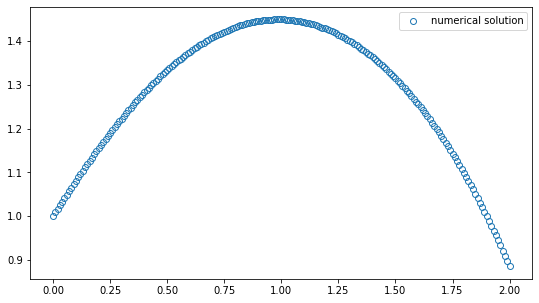

In [7]:
def g(t,y):
    return np.sin(y) - t


def dg(t,y):
    return np.cos(y)

tspan = [0, 2]
y0 = 1
k = 0.01
[t,y] = euleroimplicito(g,tspan,y0,dg,k)
plt.figure(figsize=(9,5))
plt.plot(t,y,'o',markerfacecolor='None',label='numerical solution')
plt.legend()